# La Rocca Marco Mock Exam 29/01/2023

In [1]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, silhouette_samples

# Variables
file_name = 'exam_data.csv'
separator = ','
random_state = 42

# Directives
%matplotlib inline
np.random.seed(random_state)

### 1 Load data, separate in X all columns but the last one, in y the last column, then produce a pairplot and comment what you see (2 pt)


In [2]:
# Read the file
df = pd.read_csv(file_name, delimiter = separator, header = 'infer')
df

,A0,A1,A2,y
0,2067.582042,-15.259519,0.020472,2
1,1319.589579,-18.412320,0.521308,0
2,1170.212183,-19.470602,0.814986,0
3,1424.162191,9.867841,0.848751,1
4,1551.069098,11.809364,0.884964,1
...,...,...,...,...
995,1451.791831,10.254577,0.123298,1
996,1277.830182,-16.022798,0.075187,0
997,1584.980652,-16.794614,0.518653,2
998,1587.214997,13.029405,0.609408,1


In [3]:
x = df.drop('y', axis=1)
y = df.y
print('x:')
print(x.shape)
print(x)
print('y:')
print(x.shape)
print(y)

x:
(1000, 3)
              A0         A1        A2
0    2067.582042 -15.259519  0.020472
1    1319.589579 -18.412320  0.521308
2    1170.212183 -19.470602  0.814986
3    1424.162191   9.867841  0.848751
4    1551.069098  11.809364  0.884964
..           ...        ...       ...
995  1451.791831  10.254577  0.123298
996  1277.830182 -16.022798  0.075187
997  1584.980652 -16.794614  0.518653
998  1587.214997  13.029405  0.609408
999  1691.914903 -11.799702  0.316280

[1000 rows x 3 columns]
y:
(1000, 3)
0      2
1      0
2      0
3      1
4      1
      ..
995    1
996    0
997    2
998    1
999    2
Name: y, Length: 1000, dtype: int64


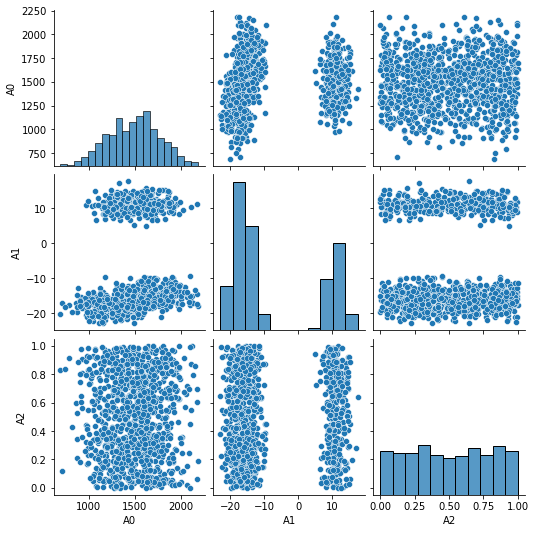

In [4]:
sns.pairplot(x)

Only certain plots like (A0,A1) and (A1,A2) seem to show interesting configurations with 2 clusters clearly visible.

### 2 Find the best clustering scheme for X with a method of your choice, plot the silhouette index for an appropriate range of parameters and show the chosen hyperparameter(s) (4 pt)
1 Decide visually the best number of clusters

In [5]:
from sklearn.model_selection import ParameterGrid
import warnings
warnings.filterwarnings("ignore")

distorsion_km = []
silhouette_scores_km = []

k_range = list(range(2,11)) # set the range of k values to test 
parameters_km = [{'n_clusters': k_range}]
pg = list(ParameterGrid(parameters_km))

for i in range(len(pg)):
    km = KMeans(**(pg[i]), random_state=random_state)

    y_km = km.fit_predict(x)
    
    distorsion_km.append(km.inertia_)
    silhouette_scores_km.append(silhouette_score(x,y_km))

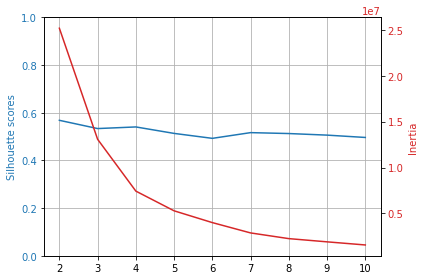

In [6]:
fig, ax1 = plt.subplots()

color = 'tab:blue'
ax1.set_ylabel('Silhouette scores', color=color)  # we already handled the x-label with ax1
ax1.plot(k_range, silhouette_scores_km, color=color)
ax1.tick_params(axis='y', labelcolor=color)
plt.grid()

ax1.set_ylim(0,1) # the axis for silhouette is [0,1]

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:red'
ax2.set_xlabel('Number of clusters')
ax2.set_ylabel('Inertia', color=color)
ax2.plot(k_range, distorsion_km, color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

Number of clusters: 2 
The silhouette score is always > 0.5 (except with 6 clusters), it doesn't limit the choice of number of clusters in any way. 
The best number of clusters decided only by taking a look at the pairplot is 2 without a doubt.

(Distortion analysis wasn't requested, i plotted it and if i had to consider it, I would have gone with 4 clusters, because it has way less inertia)

### 3 Fit the clustering scheme, store the cluster labels in y_km and output the silhouette score (2 pt)

In [7]:
k=4
km = KMeans(n_clusters=k, 
            random_state=random_state)
y_km = km.fit_predict(x)
print("Number of clusters = {}\t- Distortion = {:6.2f}\t- Silhouette score = {:4.2f}"\
    .format(k, distorsion_km[k_range.index(k)],silhouette_scores_km[k_range.index(k)]))

Number of clusters = 4	- Distortion = 7425539.96	- Silhouette score = 0.54


### 4 Use the labels in the last column of the output file as the "gold standard" for the clustering and quantify the matching among the two clustering schemes with sklearn.metrics.cluster.pair_confusion_matrix (2 pt)

In [8]:
from sklearn.metrics import accuracy_score
from sklearn.metrics.cluster import pair_confusion_matrix

pcm = pair_confusion_matrix(labels_true=y, labels_pred=y_km)
print("The percentage of match between the two clustering schemes is {:6.2f}%".format((pcm / pcm.sum()).diagonal().sum()*100))
pcm

The percentage of match between the two clustering schemes is  64.60%


array([[521350, 145316],
       [208308, 124026]], dtype=int64)

### 5 consider possible pre-processing actions, repeat the fitting and evaluate as before the result of the new fitting (5 pt)

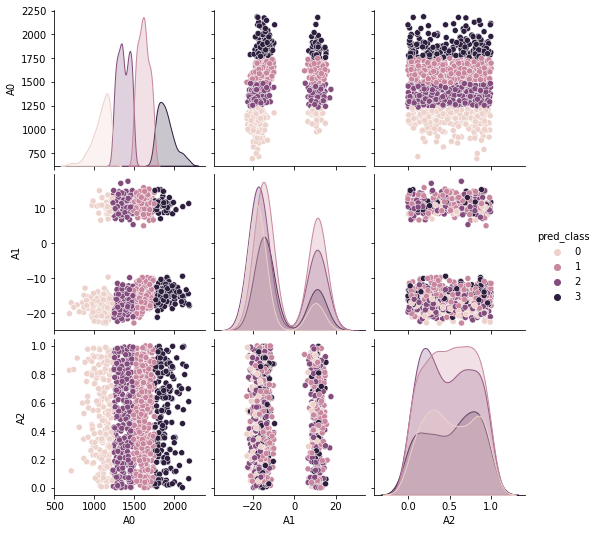

In [9]:
x_pred = x.copy()
x_pred["pred_class"] = y_km

sns.pairplot(x_pred, hue = 'pred_class')

It could be a good idea to make a Rescaling to map the domains to standard ranges with no change in distribution

In [10]:
# remap on the 0:1 range with MinMaxScaler
from sklearn.preprocessing import MinMaxScaler
mms = MinMaxScaler()
X = pd.DataFrame(mms.fit_transform(x), columns = x.columns)
X.head()

,A0,A1,A2
0,0.920959,0.187350,0.020071
1,0.420655,0.109367,0.521198
2,0.320742,0.083191,0.815046
3,0.490599,0.808861,0.848830
4,0.575483,0.856884,0.885065


In [11]:
distorsion_km = []
silhouette_scores_km = []

k_range = list(range(2,11)) # set the range of k values to test 
parameters_km = [{'n_clusters': k_range}]
pg = list(ParameterGrid(parameters_km))

for i in range(len(pg)):
    km = KMeans(**(pg[i]), random_state=random_state)

    y_km = km.fit_predict(X)
    
    distorsion_km.append(km.inertia_)
    silhouette_scores_km.append(silhouette_score(X,y_km))

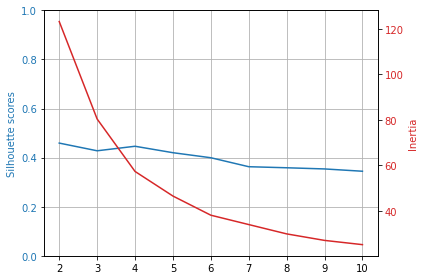

In [12]:
fig, ax1 = plt.subplots()

color = 'tab:blue'
ax1.set_ylabel('Silhouette scores', color=color)  # we already handled the x-label with ax1
ax1.plot(k_range, silhouette_scores_km, color=color)
ax1.tick_params(axis='y', labelcolor=color)
plt.grid()

ax1.set_ylim(0,1) # the axis for silhouette is [0,1]

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:red'
ax2.set_xlabel('Number of clusters')
ax2.set_ylabel('Inertia', color=color)
ax2.plot(k_range, distorsion_km, color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

In [16]:
k=4
km = KMeans(n_clusters=k, 
            random_state=random_state)
y_km = km.fit_predict(X)
print("Number of clusters = {}\t- Distortion = {:6.2f}\t- Silhouette score = {:4.2f}"\
    .format(k, distorsion_km[k_range.index(k)],silhouette_scores_km[k_range.index(k)]))

pcm = pair_confusion_matrix(labels_pred=y_km, labels_true=y)
print("The percentage of match between the two clustering schemes is {:6.2f}%".format((pcm / pcm.sum()).diagonal().sum()*100))

Number of clusters = 4	- Distortion =  57.38	- Silhouette score = 0.45
The percentage of match between the two clustering schemes is  72.33%


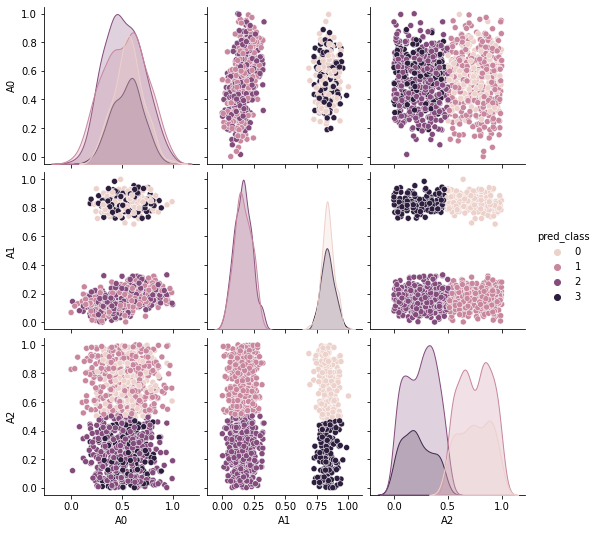

In [17]:
X_pred = X.copy()
X_pred["pred_class"] = y_km

sns.pairplot(X_pred, hue = 'pred_class')

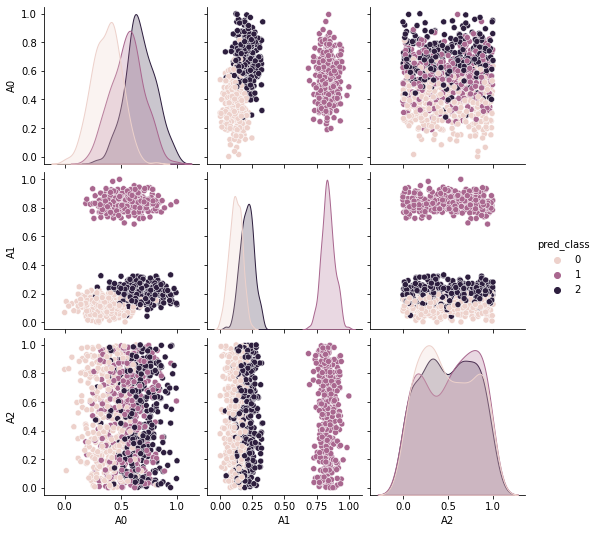

In [18]:
X_pred = X.copy()
X_pred["pred_class"] = y

sns.pairplot(X_pred, hue = 'pred_class')

Accuracy has gone up from 64,6 % to 72.33%.
Distortion is still really high.
Visually seems that clustering is correctly done.